Objetivo: Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula. 

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


Submeta uma pasta que contenha: 
- o arquivo .ipynb com sua análise exploratória rodada, ou seja, com as respostas aparecendo no notebook;
- interpretações observadas a partir dos gráficos dentro do notebook;
- a base final criada por você no formato .csv;
- especificar quais bases da olist foram usadas;

Perguntas:
Qual o estado com mais consumidores
Qual a categoria de produto mais consumida
Qual produto com mais visualizações
Qual grupo de produtos por região

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [86]:
df_consumidor = pd.read_csv('olist_customers_dataset.csv')
df_consumidor.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [87]:
df_consumidor.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [88]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [89]:
columns_drop = ['customer_id', 'customer_unique_id']
df_consumidor = df_consumidor.drop(columns_drop, axis=1)
#df_consumidor = df_consumidor.drop(columns_drop)

In [90]:
df_consumidor = pd.read_csv('olist_customers_dataset.csv', dtype={"customer_zip_code_prefix": "string"})
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [91]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  string
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(4), string(1)
memory usage: 3.8+ MB


In [92]:
df_consumidor.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [93]:
df_consumidor.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [94]:
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [95]:
df_categoria  = pd.read_csv('product_category_name_translation.csv')
df_categoria.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [96]:
df_categoria.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [97]:
df_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [98]:
df_categoria

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [99]:
columns_drop = ['product_category_name_english']
df_categoria = df_categoria.drop(columns_drop, axis=1)
#df_consumidor = df_consumidor.drop(columns_drop)

In [100]:
df_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_name  71 non-null     object
dtypes: object(1)
memory usage: 700.0+ bytes


In [101]:
df_order_localizacao = pd.read_csv('olist_orders_dataset.csv')
df_order_localizacao.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [102]:
df_order_localizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [103]:
columns_drop = ['order_status','order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date' ]
df_order_localizacao = df_order_localizacao.drop(columns_drop, axis=1)


In [104]:
df_order_localizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     99441 non-null  object
 1   customer_id  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [105]:
df_produto = pd.read_csv('olist_products_dataset.csv')

In [106]:
df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [107]:
columns_drop = ['product_id' ,'product_name_lenght' ,'product_description_lenght', 'product_photos_qty', 'product_weight_g','product_length_cm', 'product_height_cm','product_width_cm']
df_produto = df_produto.drop(columns_drop, axis=1)

In [108]:
df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_name  32341 non-null  object
dtypes: object(1)
memory usage: 257.6+ KB


In [109]:
df_produto_items = pd.read_csv('olist_order_items_dataset.csv')

In [110]:
df_produto_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [111]:
columns_drop = ['seller_id' ,'shipping_limit_date' ,'freight_value']
df_produto_items = df_produto_items.drop(columns_drop, axis=1)

In [112]:
df_produto_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [113]:
# Jutando items produto com localização
df_olist_prod_loc= pd.merge(df_produto_items, df_order_localizacao, on="order_id" , how="inner")
df_olist_prod_loc.head()

,order_id,order_item_id,product_id,price,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795


In [114]:
df_olist_prod_loc.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [115]:
# Jutando os estado do consumidor com categoria order e custumer
df_olist_junto = pd.merge(df_consumidor, df_order_localizacao, on="customer_id" , how="inner")
df_olist_junto.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f


In [116]:
df_olist_junto.to_csv('olist_final_s14.csv', index=False)

In [117]:
df_olist_junto.describe()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id
count,99441,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27,99441
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP,28db69209a75e59f20ccbb5c36a20b90
freq,1,17,142,15540,41746,1


In [118]:
df_olist_junto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  string
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
 5   order_id                  99441 non-null  object
dtypes: object(5), string(1)
memory usage: 4.6+ MB


Gráfico cidade com mais consumidores 

Acredito que por ser a capital econômica, São Paulo acaba sendo o polo de maior indice de consumo talvez pela taxa de entrega, regiões mais acessivéis e número de habitantes.

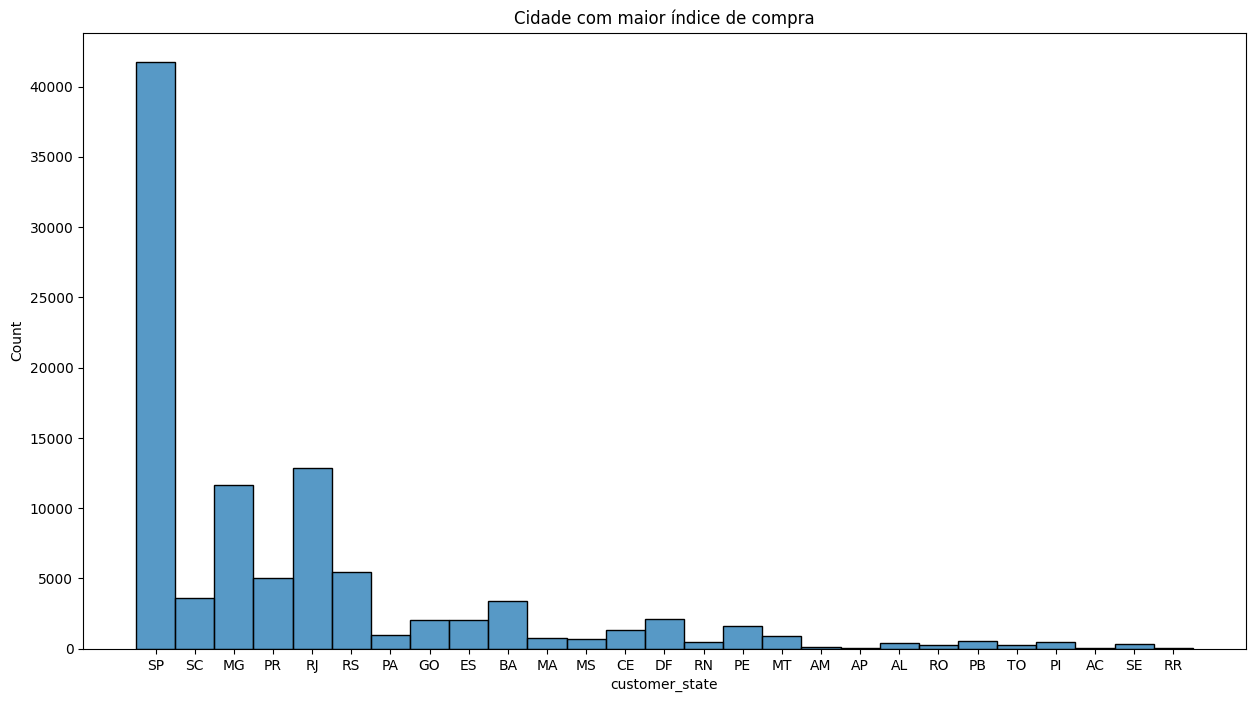

In [146]:
plt.figure(figsize=(15,8))
sns.histplot(df_olist_junto.customer_state, binwidth=50)
plt.title('Cidade com maior índice de compra')
plt.show()

Qual a categoria de produto mais consumida:

Segunda a análise o produto mais consumido são itens de cama_mesa_e_banho não podendo afirmar que haja um público chave para isso, pois não foi análisado períodos e nem tipo de consumidor.

In [120]:
# Jutando produtor com catergoria 
df_olist_prod_cat= pd.merge(df_categoria, df_produto, on="product_category_name", how="inner")
df_olist_prod_cat.head()

,product_category_name
0,beleza_saude
1,beleza_saude
2,beleza_saude
3,beleza_saude
4,beleza_saude


In [121]:
# Remover duplicatas
df_olist_prod_cat_unique = df_olist_prod_cat.drop_duplicates()

# Organizar a lista por categoria de produto
df_olist_prod_cat_sorted = df_olist_prod_cat_unique.sort_values(by='product_category_name').reset_index(drop=True)

# Exibindo as primeiras linhas do DataFrame organizado
print(df_olist_prod_cat_sorted.head())


       product_category_name
0  agro_industria_e_comercio
1                  alimentos
2          alimentos_bebidas
3                      artes
4         artes_e_artesanato


In [122]:
df_olist_prod_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_name  32328 non-null  object
dtypes: object(1)
memory usage: 252.7+ KB


In [123]:
df_olist_prod_cat.to_csv('olist_final_prod_cat_s14.csv', index=False)

In [124]:
# Contagem das categorias de produtos
contagem_categorias = df_olist_prod_cat['product_category_name'].value_counts().reset_index()
contagem_categorias.columns = ['product_category_name', 'count']


C:\Users\sanel\AppData\Local\Temp\ipykernel_12380\1853623087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_category_name', data=top_10_categorias, palette='viridis')


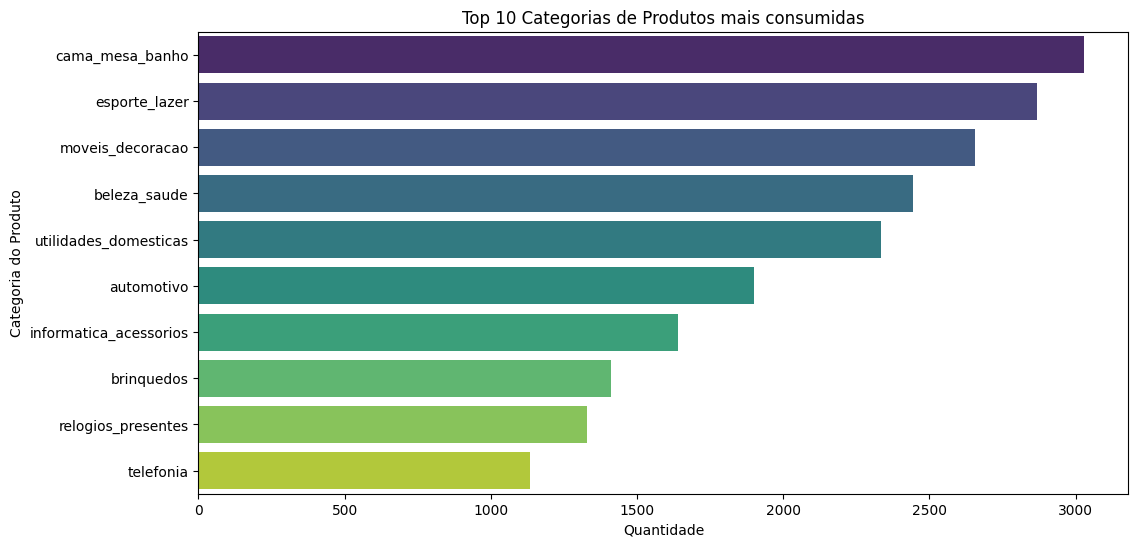

In [125]:
# Exibir as 10 principais categorias
top_10_categorias = contagem_categorias.head(10)

# Plotando o gráfico de barras para as 10 principais categorias
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='product_category_name', data=top_10_categorias, palette='viridis')
plt.xlabel('Quantidade')
plt.ylabel('Categoria do Produto')
plt.title('Top 10 Categorias de Produtos mais consumidas')
plt.show()


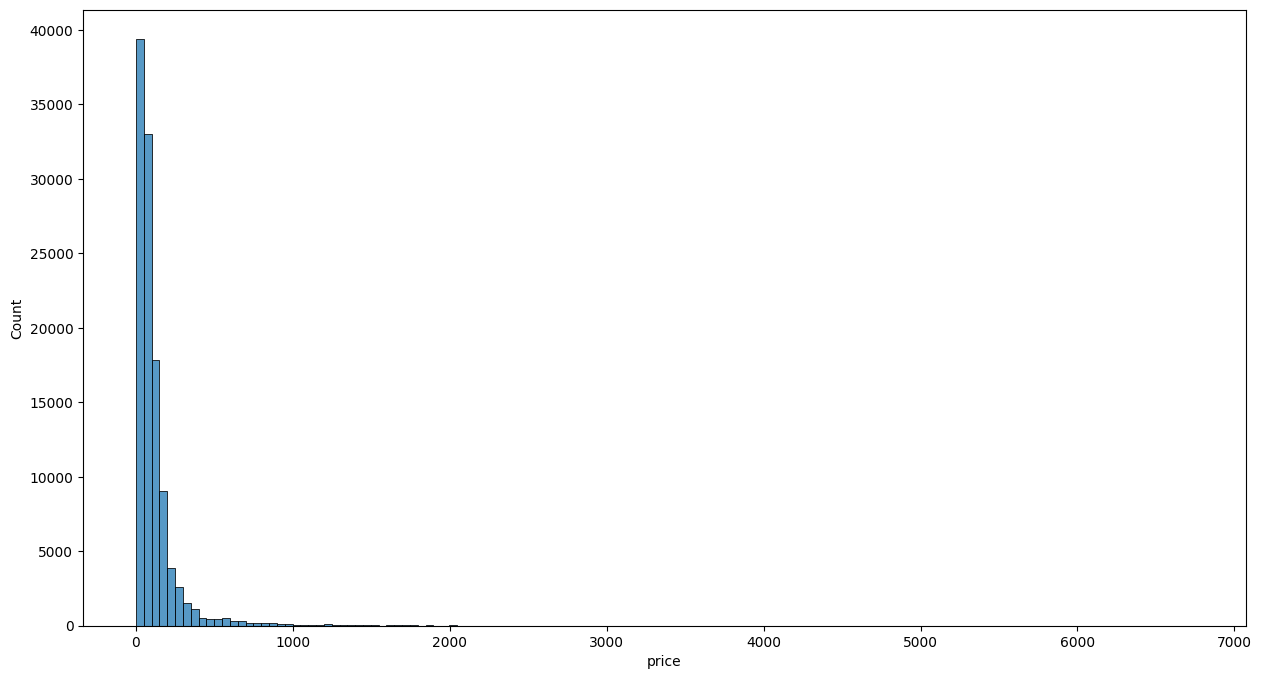

In [142]:
plt.figure(figsize=(15,8))
sns.histplot(df_produto_items.price, binwidth=50)
plt.show()


Gráfico qual o tiket médio de compra

Não consegui evoluir

C:\Users\sanel\AppData\Local\Temp\ipykernel_12380\1748539771.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='count', data=price_range_counts, palette='viridis')


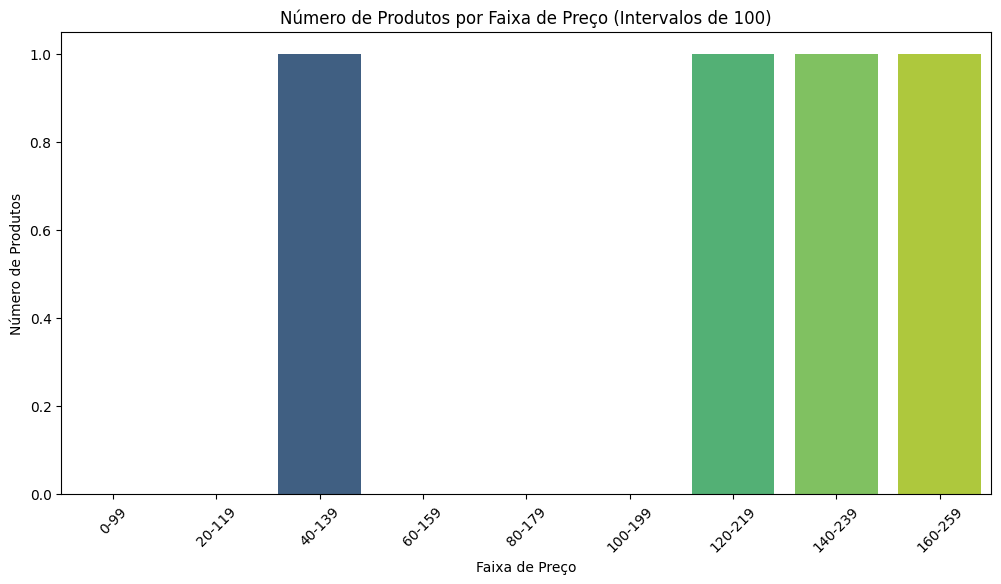

In [151]:

price_range_counts = df_produto_items['price_range'].value_counts().sort_index().reset_index()
price_range_counts.columns = ['price_range', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='price_range', y='count', data=price_range_counts, palette='viridis')
plt.xlabel('Faixa de Preço')
plt.ylabel('Número de Produtos')
plt.title('Número de Produtos por Faixa de Preço (Intervalos de 100)')
plt.xticks(rotation=45) 
plt.show()
